In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utilities import *
from utilitiesDL import *
from getModFeat import *

/home/byk004/miniconda3/envs/cyclo_modul_OFDM/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
dataLen = 8000
nSource = 100
SNRList = range(40, 41, 5)
modList = [2]
# modList = [256, 1024]

USRPoutputDir = '/project/iarpa/byungjun/cyclo_modul_OFDM/USRPoutput/wlanHE_Normal/'
for mod in modList:
    if mod == 2:
        modName = 'bpsk'
    elif mod == 4:
        modName = 'qpsk'
    elif mod == 16:
        modName = '16qam'
    elif mod == 64:
        modName = '64qam'
    elif mod == 256:
        modName = '256qam'
    elif mod == 1024:
        modName = '1024qam'

    for SNR in SNRList:
        filePrefix = 'wlanHE_Normal_' + str(mod) + '_0_' + str(SNR) + '_20_100_'
        print(filePrefix)
        filename = filePrefix + '1.iq'
        samples = np.fromfile(USRPoutputDir + filename, np.complex64)

        firstIndex = np.where(samples > 0.01)[0][0]
        # print(samples.shape, firstIndex)
        for iSource in range(nSource):
            # print(iSource)
            firstIndex = firstIndex + 16000
            samplesSource = samples[firstIndex : firstIndex+dataLen]
            samplesSource.astype(np.complex64)
            samplesSource.tofile('/project/iarpa/byungjun/cyclo_modul_OFDM/realData/wlanHE/wlanHE_Normal_' + modName  + '/' + \
                    filePrefix + str(iSource+1) + '.iq')

wlanHE_Normal_2_0_40_20_100_


(3200000,)


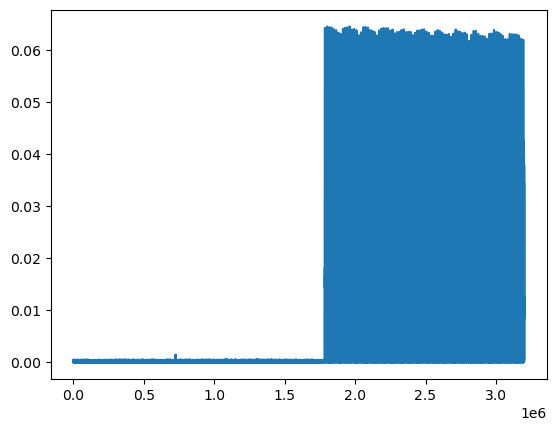

In [11]:
filePrefix = 'wlanHE_Normal_20_100_40_20_100_1.iq'
samples = np.fromfile(USRPoutputDir + filename, np.complex64)
print(samples.shape)
plt.plot(np.abs(samples))

(-0.5, 0.5)

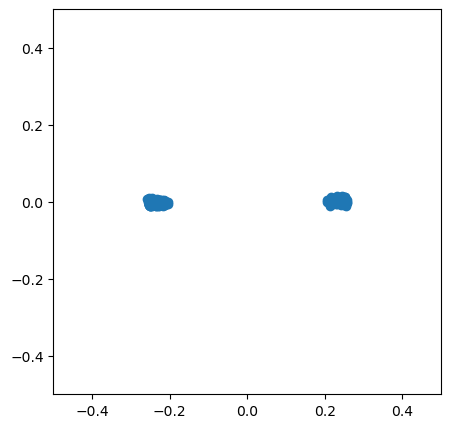

In [6]:

loadedSeq = np.fromfile('/project/iarpa/byungjun/cyclo_modul_OFDM/realData/wlanHT/wlanHT_Extended_bpsk/wlanHT_Extended_2_0_40_20_100_1.iq', np.complex64)
inputIQ = loadedSeq[2000:8000]
nSubC = 64
CPLen = 16

firstIndexSym = findFirstIndexWifi(inputIQ, nSubC, CPLen)

feat = getModFeatWifi(inputIQ, nSubC, CPLen, firstIndexSym, 5, True, False)
plt.figure(figsize=(5,5))
plt.scatter(np.real(feat), np.imag(feat))
plt.xlim([-.5, .5])
plt.ylim([-.5, .5])
